In [39]:
from os.path import join

import cv2
import matplotlib.pyplot as plt

import torch

from dataloader import get_noisy_image, transformations
from model import autoencoders, AutoEncoder, Unet

from skimage.metrics import peak_signal_noise_ratio as PSNR

In [2]:
model = Unet(in_channels=3, out_channels=3, depth=3)

In [3]:
path = "results/"

In [4]:
model.load_state_dict(torch.load(join(path, "model_rgb.pth")))
model.eval()

Unet(
  (downs): ModuleList(
    (0): ConvBlock(
      (conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01, inplace=True)
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): LeakyReLU(negative_slope=0.01, inplace=True)
      )
    )
    (1): ConvBlock(
      (conv): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01, inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=

In [32]:
dataset_path = "/Users/irina/Documents/Etudes/Université/Master/M2/S3/AdvancedImageProcessing/TP/1/data/"
test_path = join(dataset_path, "train/")

transform = transformations()

image = cv2.imread(join(test_path, "DSC00213.jpg"))
image= transform(image).unsqueeze(0)
image = image
noisy_image = get_noisy_image(image)
preds = model(noisy_image)
target = torch.clone(image)

In [48]:
def imshow(pred, target, noisy_img, ax=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(20,20))
    pred = pred.numpy().transpose((1, 2, 0))
    noisy_img = noisy_img.numpy().transpose((1, 2, 0))
    target = target.numpy().transpose((1, 2, 0))

    psnr_noisy = PSNR(target, noisy_img)
    psnr_pred = PSNR(target, pred)

    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    ax[0].imshow(target)
    ax[0].set_title("Original image")
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].tick_params(axis='both', length=0)
    ax[0].set_xticklabels('')
    ax[0].set_yticklabels('')

    ax[1].imshow(noisy_img)
    ax[1].set_title("Noisy image")
    ax[1].set_xlabel(f'PSNR : {psnr_noisy:.02f}')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].tick_params(axis='both', length=0)
    ax[1].set_xticklabels('')
    ax[1].set_yticklabels('')

    ax[2].imshow(pred)
    ax[2].set_title("Predicted image")
    ax[2].set_xlabel(f'PSNR : {psnr_pred:.02f}')
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)
    ax[2].tick_params(axis='both', length=0)
    ax[2].set_xticklabels('')
    ax[2].set_yticklabels('')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


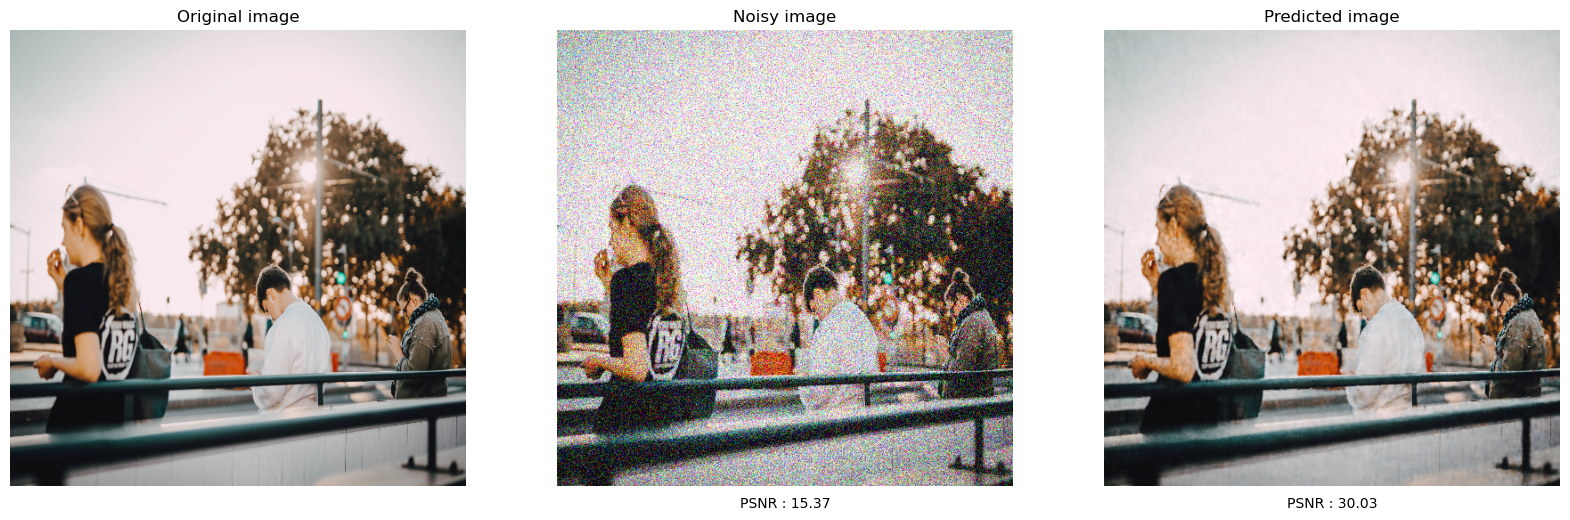

In [49]:
imshow(preds[0].detach(), target[0].detach(), noisy_image[0].detach(), normalize=False)